In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from category_encoders import TargetEncoder
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('training.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
df[df['ProductId']== 'ProductId_1']

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
53,TransactionId_54845,BatchId_133026,AccountId_1479,SubscriptionId_708,CustomerId_1849,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1000.0,1000,2018-11-15T06:14:20Z,2,0
117,TransactionId_131898,BatchId_130515,AccountId_4103,SubscriptionId_4066,CustomerId_4554,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T07:13:47Z,2,0
120,TransactionId_45385,BatchId_120103,AccountId_4103,SubscriptionId_4066,CustomerId_4554,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1500.0,1500,2018-11-15T07:27:48Z,2,0
161,TransactionId_80984,BatchId_66340,AccountId_3595,SubscriptionId_1749,CustomerId_4033,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,800.0,800,2018-11-15T08:45:01Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95580,TransactionId_34071,BatchId_119750,AccountId_3122,SubscriptionId_1271,CustomerId_3549,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,5000.0,5000,2019-02-13T08:54:33Z,2,0
95624,TransactionId_27815,BatchId_11732,AccountId_4383,SubscriptionId_2283,CustomerId_4840,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:27:43Z,2,0
95645,TransactionId_131922,BatchId_69178,AccountId_1726,SubscriptionId_3565,CustomerId_2111,UGX,256,ProviderId_3,ProductId_1,airtime,ChannelId_3,5000.0,5000,2019-02-13T09:39:30Z,1,0
95651,TransactionId_16042,BatchId_49303,AccountId_215,SubscriptionId_137,CustomerId_539,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,3000.0,3000,2019-02-13T09:50:12Z,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# Exploratory Data Analysis

First I visualise the distribution of the label

The number of fraudlent transaction is  193
The number of non fraudlent transaction is  95469
The percentage of nonfraudlent transaction is  99.8


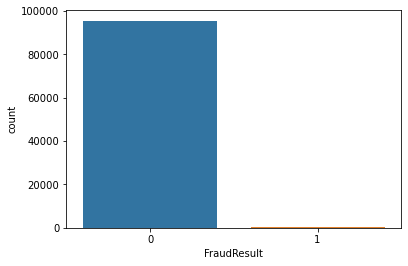

In [7]:
ax = sns.countplot(x='FraudResult', data=df)
fraudlent = len(df[df['FraudResult']==1])
nonfraudlent = len(df[df['FraudResult']==0])
print('The number of fraudlent transaction is ',fraudlent)
print('The number of non fraudlent transaction is ', nonfraudlent)
print('The percentage of nonfraudlent transaction is ', round((nonfraudlent/len(df)) *100,2))

### Feature Engineering

I created year, month, day and hour features from the TransactionStartTime feature

In [8]:
df['Date'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionMonth'] = df['Date'].dt.month
df['TransactionDay']=df['Date'].dt.dayofweek
df['TransactionHour'] = df['Date'].dt.hour
df.head(20)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Date,TransactionMonth,TransactionDay,TransactionHour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018-11-15 02:18:49+00:00,11,3,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,2018-11-15 02:19:08+00:00,11,3,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,2018-11-15 02:44:21+00:00,11,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018-11-15 03:32:55+00:00,11,3,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,2018-11-15 03:34:21+00:00,11,3,3
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0,2018-11-15 03:35:10+00:00,11,3,3
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0,2018-11-15 03:44:31+00:00,11,3,3
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0,2018-11-15 03:45:13+00:00,11,3,3
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0,2018-11-15 04:14:59+00:00,11,3,4
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0,2018-11-15 04:31:48+00:00,11,3,4


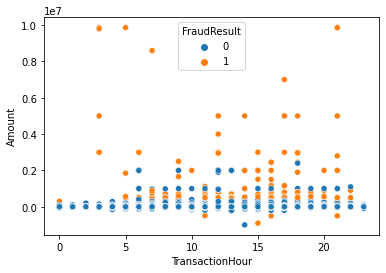

In [9]:
ax = sns.scatterplot(data=df, x='TransactionHour', y='Amount', hue='FraudResult')

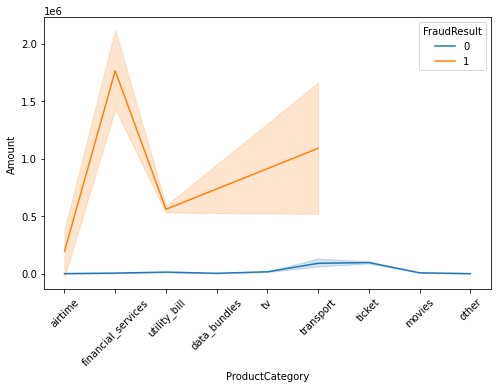

In [10]:
def lineplot(arg):
    plt.figure(figsize=(8,5))
    ax = sns.lineplot(data=arg, x='ProductCategory', y='Amount', hue="FraudResult")
    plt.xticks(rotation=45)
    plt.show

lineplot(df)

From the plot, we have an imbalanced data. I will divide the data into fraud and non fraudlent to have a better view of the dataset, and see the interaction of the features to the label.

In [11]:
fraud = df.loc[df['FraudResult']==1]
fraud.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionMonth,TransactionDay,TransactionHour
count,193.0,1.930000e+02,1.930000e+02,193.000000,193.0,193.000000,193.000000,193.000000
mean,256.0,1.535272e+06,1.561820e+06,1.704663,1.0,5.533679,2.725389,13.341969
std,0.0,2.100525e+06,2.081227e+06,0.963300,0.0,5.096992,1.860283,5.073127
min,256.0,-9.000000e+05,5.000000e+02,0.000000,1.0,1.000000,0.000000,0.000000
25%,256.0,5.000000e+05,5.000000e+05,2.000000,1.0,1.000000,1.000000,10.000000
50%,256.0,6.000000e+05,6.500000e+05,2.000000,1.0,2.000000,3.000000,13.000000
75%,256.0,2.000000e+06,2.000000e+06,2.000000,1.0,12.000000,4.000000,17.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.0,12.000000,6.000000,22.000000


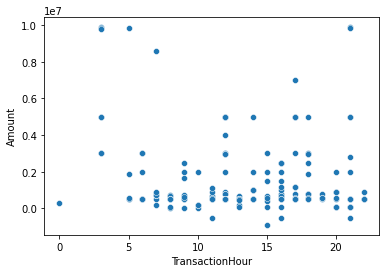

In [12]:
ax = sns.scatterplot(data=fraud, x='TransactionHour', y='Amount')
plt.show()

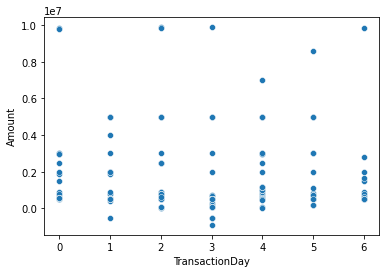

In [13]:
ax = sns.scatterplot(data=fraud, x='TransactionDay', y='Amount')

<function matplotlib.pyplot.show(close=None, block=None)>

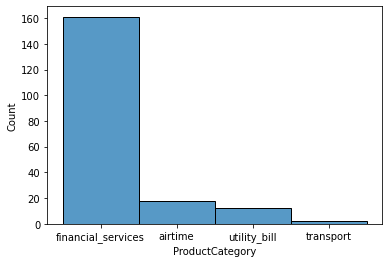

In [14]:
ax = sns.histplot(data=fraud, x='ProductCategory')
# plt.xticks(90)
plt.show

In [15]:
nonfraud = df.loc[df['FraudResult']==0]
nonfraud.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionMonth,TransactionDay,TransactionHour
count,95469.0,9.546900e+04,9.546900e+04,95469.000000,95469.0,95469.000000,95469.000000,95469.000000
mean,256.0,3.627723e+03,6.763227e+03,2.257089,0.0,6.568321,3.012486,12.445914
std,0.0,4.035711e+04,3.999484e+04,0.731971,0.0,5.224384,1.863623,4.846357
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.0,1.000000,0.000000,0.000000
25%,256.0,-5.000000e+01,2.500000e+02,2.000000,0.0,1.000000,1.000000,8.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.0,11.000000,3.000000,13.000000
75%,256.0,2.500000e+03,5.000000e+03,2.000000,0.0,12.000000,4.000000,17.000000
max,256.0,2.400000e+06,2.400000e+06,4.000000,0.0,12.000000,6.000000,23.000000


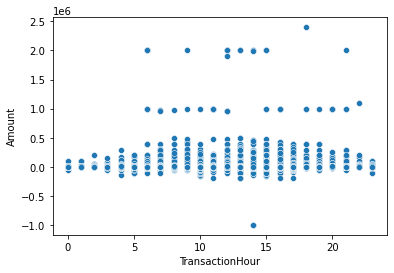

In [16]:
ax = sns.scatterplot(data=nonfraud, x='TransactionHour', y='Amount')
plt.show()

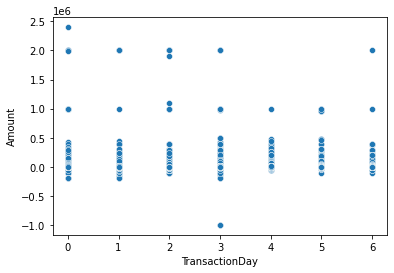

In [17]:
ax = sns.scatterplot(data=nonfraud, x='TransactionDay', y='Amount')

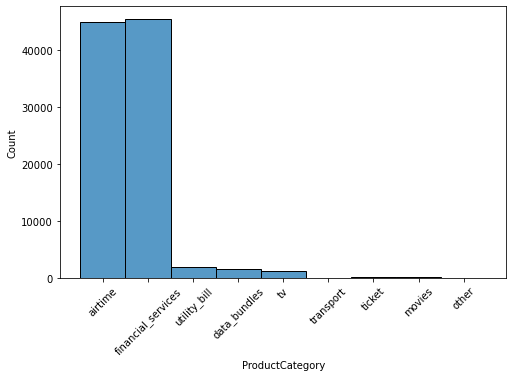

In [18]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='ProductCategory')
plt.xticks(rotation=45)
plt.show()

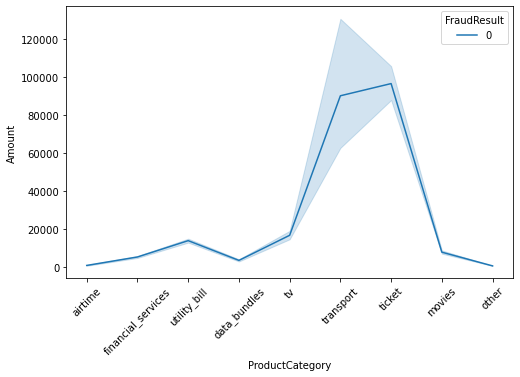

In [19]:
lineplot(nonfraud)

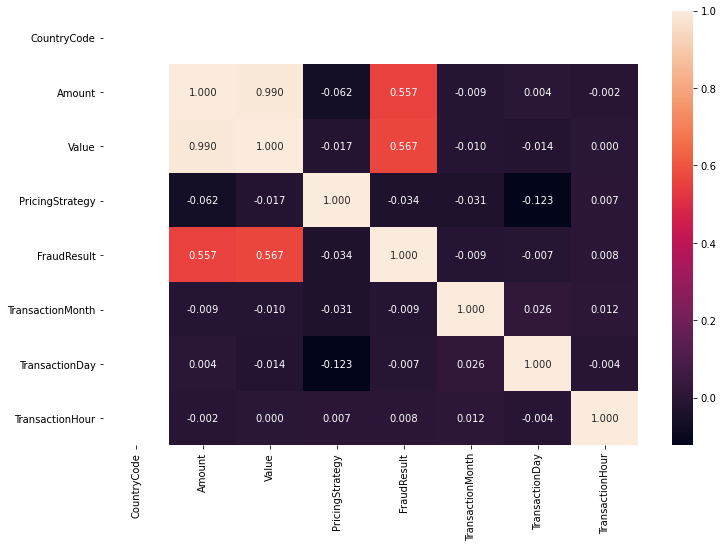

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df.corr(), annot=True, fmt='.3f')

# Preprocessing

From the correlation map above, value and amount is correlated, so I will drop the Amount feature, TransactionYear is correlated to TransactionMonth so I will drop the TransactionYear since it is just a year datasets. Then I will drop the TransactionStartTime column and the Ids column because I don't want my model to train only on the available Ids in the data and not be able to predict when a different dataset with different set of Ids is presented. Also, I will drop the currencyCode and the CountryCode, because they are the same across the dataset.

* Note
I am assuming there are only 6 providers so I am not dropping the feature, rather, I will encode it to numeric values.

In [21]:
df2 = df.copy()
df2.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Date,TransactionMonth,TransactionDay,TransactionHour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018-11-15 02:18:49+00:00,11,3,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,2018-11-15 02:19:08+00:00,11,3,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,2018-11-15 02:44:21+00:00,11,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018-11-15 03:32:55+00:00,11,3,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,2018-11-15 03:34:21+00:00,11,3,3


In [22]:
features = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProductId', 'Amount', 'TransactionStartTime', 'Date' ]
df2=df2.drop(features, axis = 1)

In [23]:
df2.head()

,ProviderId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,TransactionMonth,TransactionDay,TransactionHour
0,ProviderId_6,airtime,ChannelId_3,1000,2,0,11,3,2
1,ProviderId_4,financial_services,ChannelId_2,20,2,0,11,3,2
2,ProviderId_6,airtime,ChannelId_3,500,2,0,11,3,2
3,ProviderId_1,utility_bill,ChannelId_3,21800,2,0,11,3,3
4,ProviderId_4,financial_services,ChannelId_2,644,2,0,11,3,3


In [24]:
df2.ChannelId.value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: ChannelId, dtype: int64

Next I will transform the categorical features using one hot encoding. I am using this because they are nominal columns with low cardinality.

In [25]:
# Use label encode to assign labels so I can esily re-assign the columns correctly after one hot encoding
le = LabelEncoder()
df2['ProviderIdEncoded'] = le.fit_transform(df2.ProviderId)
df2['ProductCatEncoded'] = le.fit_transform(df2.ProductCategory)
df2['ChannelIdEncoded'] = le.fit_transform(df2.ChannelId)

In [26]:
encoder = OneHotEncoder(categories = 'auto')
X = encoder.fit_transform(
    df2['ProviderIdEncoded'].values.reshape(-1,1)).toarray()
dfProvOneHot = pd.DataFrame(X)
dfProvOneHot.columns = ['providerId_1', 'providerId_2', 'providerId_3', 'providerId_4', 'providerId_5', 'providerId_6' ]
X2 = encoder.fit_transform(
    df2['ProductCatEncoded'].values.reshape(-1,1)).toarray()
dfProdOneHot = pd.DataFrame(X2)
dfProdOneHot.columns = ['ProdCatAirtime', 'ProdCatDataBundles','ProdCatFinancialServices', 'ProdCatMovies', 'ProdCatOther', 'ProdCatTicket', 'ProdCatTransport', 'ProdCatTv', 'ProdCatUtility' ]
# X3 = encoder.fit_transform(
#     df2['ChannelIdEncoded'].values.reshape(-1,1)).toarray()
# dfChannelOneHot = pd.DataFrame(X3)
# dfChannelOneHot.columns = ['ChannelId_1', 'ChannelId_2', 'ChannelId_3', 'ChannelId_5']
df2 = pd.concat([df2,  dfProdOneHot,dfProvOneHot ], axis =1)

df2.head()

,ProviderId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,TransactionMonth,TransactionDay,TransactionHour,ProviderIdEncoded,...,ProdCatTicket,ProdCatTransport,ProdCatTv,ProdCatUtility,providerId_1,providerId_2,providerId_3,providerId_4,providerId_5,providerId_6
0,ProviderId_6,airtime,ChannelId_3,1000,2,0,11,3,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ProviderId_4,financial_services,ChannelId_2,20,2,0,11,3,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ProviderId_6,airtime,ChannelId_3,500,2,0,11,3,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ProviderId_1,utility_bill,ChannelId_3,21800,2,0,11,3,3,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ProviderId_4,financial_services,ChannelId_2,644,2,0,11,3,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Further drop the category columns as they are not needed for model training.

In [27]:
columns = ['ProviderId', 'ProductCategory', 'ChannelId', 'ProviderIdEncoded', 'ProductCatEncoded','ChannelIdEncoded', 'ProdCatAirtime' ]
df2=df2.drop(columns, axis = 1)
df2.head()

,Value,PricingStrategy,FraudResult,TransactionMonth,TransactionDay,TransactionHour,ProdCatDataBundles,ProdCatFinancialServices,ProdCatMovies,ProdCatOther,ProdCatTicket,ProdCatTransport,ProdCatTv,ProdCatUtility,providerId_1,providerId_2,providerId_3,providerId_4,providerId_5,providerId_6
0,1000,2,0,11,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,2,0,11,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,500,2,0,11,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21800,2,0,11,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,644,2,0,11,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


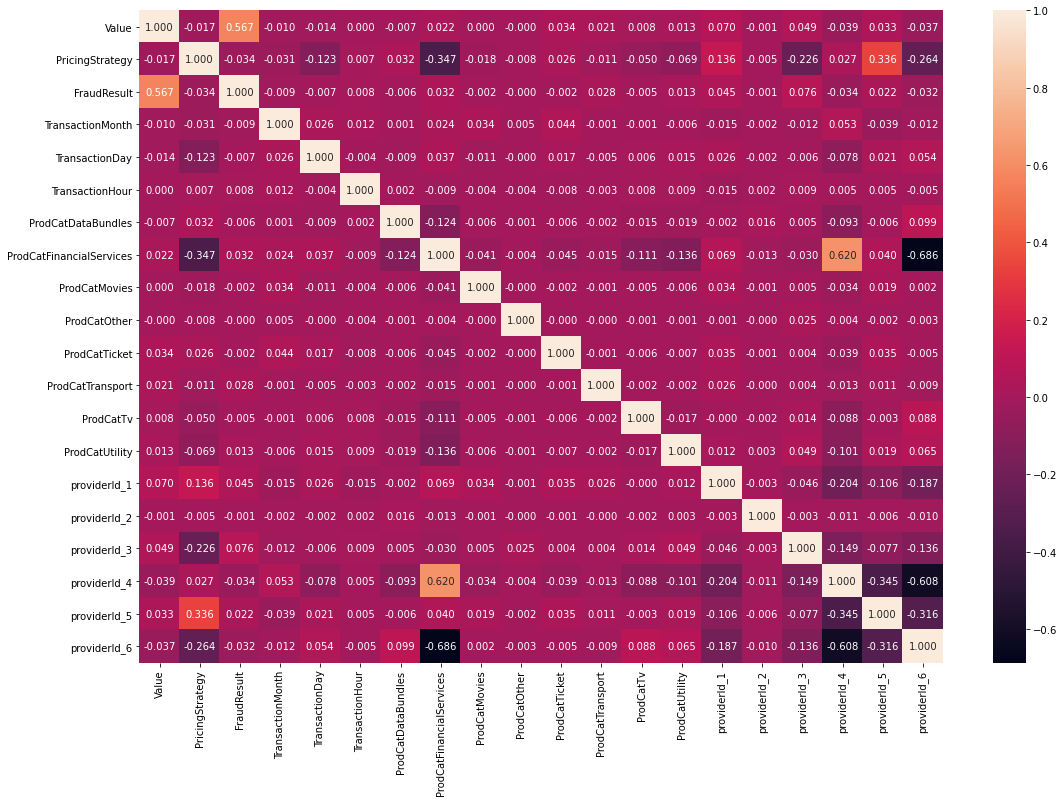

In [28]:
plt.figure(figsize=(18, 12))
ax = sns.heatmap(df2.corr(), annot=True, fmt='.3f')

I will normalise the dataset, so all the feature will be on the same scale between 0 and 1

In [29]:
scaler = MinMaxScaler()
y= df2.FraudResult
X = df2.drop('FraudResult', axis=1)
X.loc[:,:] = scaler.fit_transform(X)
X.head()


,Value,PricingStrategy,TransactionMonth,TransactionDay,TransactionHour,ProdCatDataBundles,ProdCatFinancialServices,ProdCatMovies,ProdCatOther,ProdCatTicket,ProdCatTransport,ProdCatTv,ProdCatUtility,providerId_1,providerId_2,providerId_3,providerId_4,providerId_5,providerId_6
0,0.000101,0.5,0.909091,0.5,0.086957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000002,0.5,0.909091,0.5,0.086957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000050,0.5,0.909091,0.5,0.086957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.002206,0.5,0.909091,0.5,0.130435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000065,0.5,0.909091,0.5,0.130435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Segregate to train-test split of 80/20

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

# Model Training

The dataset has 99.8% non fraudlent transaction which means that without our model doing anything, we have 99.8% chance of accuracy so a good model should exceed that percentage.

In [31]:
def model_result(model):
    model.fit(X_train, y_train)
    print("Training accuracy:", model.score(X_train, y_train), '\n')
    print("Testing accuracy:", model.score(X_test, y_test), '\n')
    print(classification_report(y_test, model.predict(X_test)))
    return model.predict(X_test)

In [32]:
def matrix_view(model, pred, label=[ "nonfraud", "fraud"]):
    plt.figure(figsize=(12, 8))
    matrix = confusion_matrix(y_test, pred)
    ax =sns.heatmap(matrix, square=True, annot=True, fmt='1d')
    plt.xticks([0.5,1.5, ], label)
    plt.yticks([0.5,1.5 ], label)
    ax.set_title(f'Confusion matrix for {model.__class__.__name__} on the testing set',fontsize = 15)
    ax.set_xlabel('Predicted Labels',fontsize = 14)
    ax.set_ylabel('True Labels',fontsize = 14)

### Logistic Regression

In [33]:
# Fit a logistic regression model to our data
lr = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=5,
                          solver='liblinear')
# lr.fit(X_train, y_train)

In [34]:
lr_pred = model_result(lr)

Training accuracy: 0.9985365025023194 

Testing accuracy: 0.9986933570271259 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.69      0.56      0.62        36

    accuracy                           1.00     19133
   macro avg       0.84      0.78      0.81     19133
weighted avg       1.00      1.00      1.00     19133



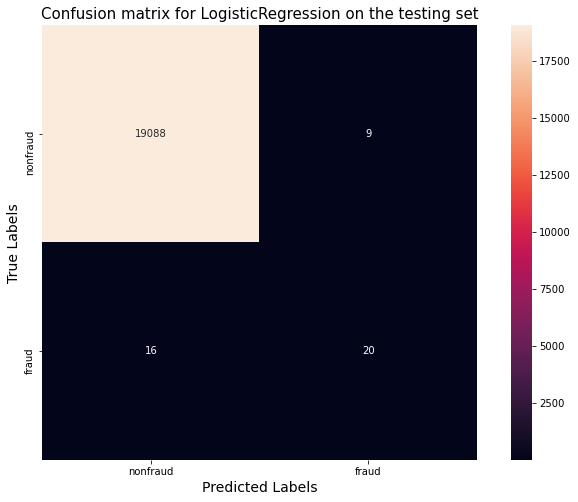

In [35]:
matrix_view(lr, lr_pred)

### Random Forest

In [36]:
rf = RandomForestClassifier(criterion='entropy', random_state=5, n_estimators=100,  )

In [37]:
rf_pred = model_result(rf)

Training accuracy: 0.9999477322322257 

Testing accuracy: 0.9995296085297654 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.86      0.89      0.88        36

    accuracy                           1.00     19133
   macro avg       0.93      0.94      0.94     19133
weighted avg       1.00      1.00      1.00     19133



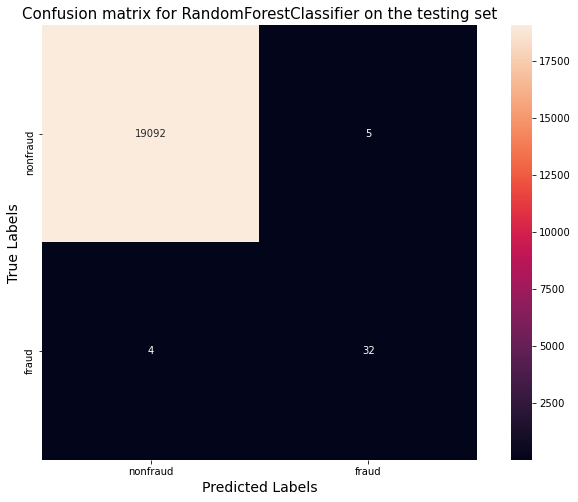

In [38]:
matrix_view(rf, rf_pred)

In [39]:
# Predict probabilities
probs = rf.predict_proba(X_test)

In [40]:
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))

ROC Score:
0.9999367265364543


The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't.

### Parameter Optimization with GridSearchCV

In [41]:
param_grid = {'n_estimators': [100, 300],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': [ 'entropy']}

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 100}

In [42]:
CV_model.best_score_

0.8213709677419354

In [43]:
grid_pred = CV_model.predict(X_test)

In [44]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.91      0.89      0.90        36

    accuracy                           1.00     19133
   macro avg       0.96      0.94      0.95     19133
weighted avg       1.00      1.00      1.00     19133



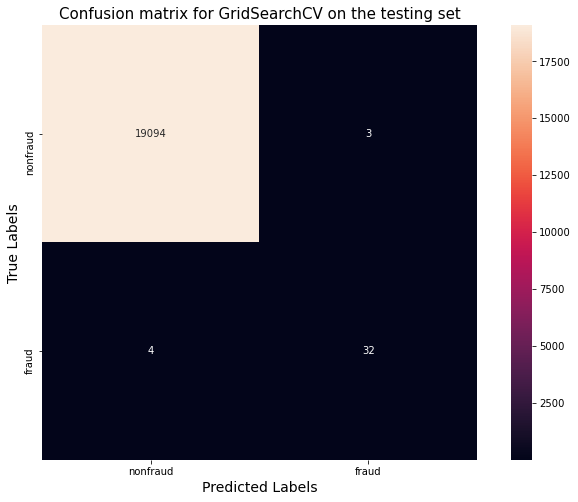

In [45]:
matrix_view(CV_model, grid_pred) 

### Feature Selection and Importance

In [46]:
#The "accuracy" scoring is proportional to the number of correct classifications  Recursive feature elimination with cross validation

rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 1
Best features : Index(['Value'], dtype='object')


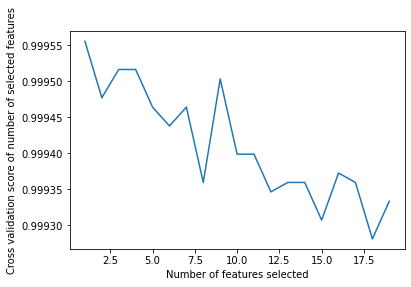

In [47]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

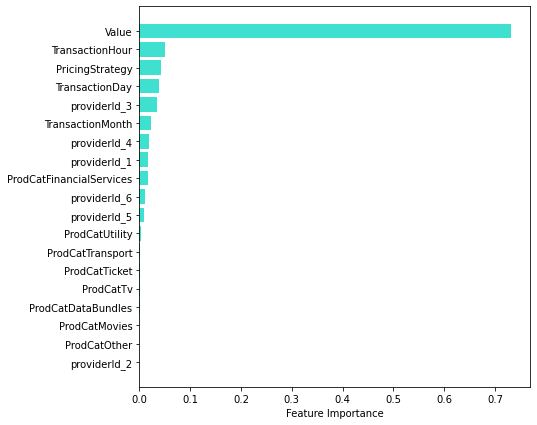

In [48]:
sorted_feature_importance = rf.feature_importances_.argsort()
plt.figure(figsize=(7,7))
plt.barh(X.columns[sorted_feature_importance],
rf.feature_importances_[sorted_feature_importance],color='turquoise')
plt.xlabel('Feature Importance')
plt.show()

# Evaluation and Recommendation

From my analysis Random Forest is the best model. Random Forest is less likely to have overfitting as it is an ensemble of decision trees. Also, tuning the hyperparamters helped with the imbalanced dataset. The performance metrics best for this problem is Recall as it better to get all the fraud cases, precision is also a good metrics because it checks how many of transactions labelled fraud are actually fraudlent. Accuracy for this model is high, but it is not a good metric for measuring how good this model is. However, the model is a good one; the recall is 0.92 and precision is 0.89.

In predicting the labels, **Value** feature is of great importance; in otherwords, the amount of money moved can be helpful in predicting if it is a fraudlent transaction or not. Also, fradulent transactions are mostly carried out via finanacialServices and airtime category. The hour of the day is also a good metric. In otherwords, the higher the amount in combination with other features in the feature importance plot, the more likely it is a fraudlent transaction.